In [4]:
import os
from S3Work import S3Facilities
import pandas as pd
from datetime import datetime, date

In [2]:
s3 = S3Facilities('alternative-market-data', 'us-east-1')

listed_files = s3.list_files('used-cars-for-sale/full_data', endswith='.json')

listed_files

Initializing AWS...
Connected successfully!


['used-cars-for-sale/full_data/localiza/2023-09-20.json',
 'used-cars-for-sale/full_data/localiza/2023-09-21.json',
 'used-cars-for-sale/full_data/localiza/2023-09-22.json',
 'used-cars-for-sale/full_data/localiza/2023-09-23.json',
 'used-cars-for-sale/full_data/localiza/2023-09-24.json',
 'used-cars-for-sale/full_data/localiza/2023-09-25.json',
 'used-cars-for-sale/full_data/localiza/2023-09-26.json',
 'used-cars-for-sale/full_data/localiza/2023-09-27.json',
 'used-cars-for-sale/full_data/localiza/2023-09-28.json',
 'used-cars-for-sale/full_data/localiza/2023-09-29.json',
 'used-cars-for-sale/full_data/localiza/2023-09-30.json',
 'used-cars-for-sale/full_data/localiza/2023-10-01.json',
 'used-cars-for-sale/full_data/localiza/2023-10-02.json',
 'used-cars-for-sale/full_data/localiza/2023-10-03.json',
 'used-cars-for-sale/full_data/localiza/2023-10-04.json',
 'used-cars-for-sale/full_data/localiza/2023-10-05.json',
 'used-cars-for-sale/full_data/localiza/2023-10-06.json',
 'used-cars-fo

In [3]:
localiza_filenames = [i for i in listed_files if 'localiza' in i]
unidas_filenames = [i for i in listed_files if 'unidas' in i]
movida_filenames = [i for i in listed_files if 'movida' in i]

In [4]:
localiza_filenames[0]

'used-cars-for-sale/full_data/localiza/2023-09-20.json'

In [5]:
localiza_df = pd.DataFrame()
for fn in localiza_filenames:
    this_df = pd.DataFrame(s3.get_object(fn))
    this_date = datetime.strptime(fn.split('/')[-1].split('.')[0], '%Y-%m-%d')
    this_df.index = [this_date]*len(this_df)
    localiza_df = pd.concat([localiza_df, this_df])
localiza_df

,Brand,Model,Year,Location,Price
2023-09-20,CITROEN,C4 CACTUS FEEL AT 1.6 4P,2021/2022,APARECIDA DE GOIÂNIA/GO,R$ 82.130
2023-09-20,RENAULT,KWID ZEN 1.0 4P,2020/2021,RIBEIRÃO PRETO/SP,R$ 47.950
2023-09-20,FIAT,STRADA CP ENDURANCE FLEX 1.4 2P,2022/2022,BELO HORIZONTE/MG,R$ 81.990
2023-09-20,RENAULT,MASTER GRAND FURGÃO L2H2 11M³ 2.3 2P,2021/2021,MACAPÁ/AP,R$ 87.540
2023-09-20,PEUGEOT,208 LIKE ESSENCIAL MT 1.6 4P,2021/2022,BELO HORIZONTE/MG,R$ 65.990
...,...,...,...,...,...
2024-02-05,FIAT,PULSE DRIVE 1.0,2022/2022,PIRACICABA/SP,R$ 95.590
2024-02-05,JEEP,RENEGADE LONGITUDE 1.3,2022/2023,SÃO LUÍS/MA,R$ 109.490
2024-02-05,FIAT,PULSE AUDACE 1.0,2022/2023,RECIFE/PE,R$ 97.890
2024-02-05,CHEVROLET,TRACKER PREMIER 1.2,2022/2023,NATAL/RN,R$ 120.990


In [6]:
movida_df = pd.DataFrame()
for fn in movida_filenames:
    this_df = pd.DataFrame(s3.get_object(fn))
    this_date = datetime.strptime(fn.split('/')[-1].split('.')[0], '%Y-%m-%d')
    this_df.index = [this_date]*len(this_df)
    movida_df = pd.concat([movida_df, this_df])
movida_df

,Brand,Model,Specification,Year,Location,Price
2023-09-20,Fiat,Mobi,Like 1.0 Fire Flex 5p.,2020/2020,"Santos, SP",R$ 46.930
2023-09-20,Fiat,Mobi,Like 1.0 Fire Flex 5p.,2019/2020,"Vitória, ES",R$ 47.230
2023-09-20,Fiat,Mobi,Like 1.0 Fire Flex 5p.,2020/2020,"Sorocaba, SP",R$ 47.880
2023-09-20,Fiat,Mobi,Like 1.0 Fire Flex 5p.,2020/2020,"Blumenau, SC",R$ 47.890
2023-09-20,Renault,Logan,Life Flex 1.0 12v 4p Mec.,2019/2020,"Aparecida de Goiânia, GO",R$ 48.450
...,...,...,...,...,...,...
2024-02-05,Volvo,Xc 60,T-8 Híbrido Inscription 2.0 5p,2021/2021,"São Paulo Gastão Vidigal, SP",R$ 296.820
2024-02-05,Volvo,S90,T-8 Inscript 2.0 Awd 407cv Híbrido,2021/2021,"São Paulo Gastão Vidigal, SP",R$ 301.680
2024-02-05,Volvo,S90,T-8 Inscript 2.0 Awd 407cv Híbrido BLINDADO,2021/2021,"São Paulo Gastão Vidigal, SP",R$ 360.360
2024-02-05,BMW,540I,M Sport 3.0 Turbo 340cv Aut. BLINDADO,2020/2020,"Brasília SIA, DF",R$ 373.820


In [7]:
unidas_df = pd.DataFrame()
for fn in unidas_filenames:
    this_df = pd.DataFrame(s3.get_object(fn))
    this_date = datetime.strptime(fn.split('/')[-1].split('.')[0], '%Y-%m-%d')
    this_df.index = [this_date]*len(this_df)
    unidas_df = pd.concat([unidas_df, this_df])
unidas_df

,Brand,Model,Location,Specification,Year,Price
2023-09-20,Chevrolet,Cruze,São Paulo / SP,1.4 TURBO FLEX SPORT6 PREMIER AUTOMÁTICO,2021/2022,R$ 133.580
2023-09-20,Chevrolet,Onix,São Paulo / SP,1.0 TURBO FLEX PLUS LTZ AUTOMÁTICO,2020/2021,R$ 81.650
2023-09-20,Chevrolet,S10,São Paulo / SP,2.8 16V TURBO DIESEL LS CS 4X4 MANUAL,2021/2022,R$ 162.830
2023-09-20,Fiat,Argo,São Paulo / SP,1.0 FIREFLY FLEX MANUAL,2021/2022,R$ 61.010
2023-09-20,Fiat,Argo,São Paulo / SP,1.0 FIREFLY FLEX DRIVE MANUAL,2020/2021,R$ 60.550
...,...,...,...,...,...,...
2024-02-05,Peugeot,2008,Belém / PA,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2022/2022,R$ 70.850
2024-02-05,Citroen,C4 Cactus,Belém / PA,1.6 VTI 120 FLEX FEEL EAT6,2022/2022,R$ 83.820
2024-02-05,Peugeot,208,Belém / PA,1.6 16V FLEX LIKE ESSENCIAL MANUAL,2021/2022,R$ 62.500
2024-02-05,Volkswagen,T-Cross,Belém / PA,1.0 200 TSI TOTAL FLEX COMFORTLINE AUTOMÁTICO,2022/2022,R$ 105.150


In [10]:
localiza_df.to_csv('localiza.csv')
unidas_df.to_csv('unidas.csv')
movida_df.to_csv('movida.csv')

In [7]:
localiza_df = pd.read_csv('localiza.csv', index_col=0)
unidas_df = pd.read_csv('unidas.csv', index_col=0)
movida_df = pd.read_csv('movida.csv', index_col=0)

In [8]:
localiza_df['Model Info'] = localiza_df['Brand'] + ' ' + localiza_df['Model'] + ' ' + localiza_df['Year']
localiza_df = localiza_df[['Model Info', 'Price']]

unidas_df['Model Info'] = unidas_df['Brand'] + ' ' + unidas_df['Model'] + ' ' + unidas_df['Year']
unidas_df = unidas_df[['Model Info', 'Price']]

movida_df['Model Info'] = movida_df['Brand'] + ' ' + movida_df['Model'] + ' ' + movida_df['Year']
movida_df = movida_df[['Model Info', 'Price']]

In [9]:
localiza_aux = localiza_df.copy()
unidas_aux = unidas_df.copy()
movida_aux = movida_df.copy()

In [10]:
localiza_aux['Price'].head(), unidas_aux['Price'].head(), movida_aux['Price'].head()

(2023-09-20    R$ 82.130
 2023-09-20    R$ 47.950
 2023-09-20    R$ 81.990
 2023-09-20    R$ 87.540
 2023-09-20    R$ 65.990
 Name: Price, dtype: object,
 2023-09-20    R$ 133.580
 2023-09-20     R$ 81.650
 2023-09-20    R$ 162.830
 2023-09-20     R$ 61.010
 2023-09-20     R$ 60.550
 Name: Price, dtype: object,
 2023-09-20    R$ 46.930
 2023-09-20    R$ 47.230
 2023-09-20    R$ 47.880
 2023-09-20    R$ 47.890
 2023-09-20    R$ 48.450
 Name: Price, dtype: object)

In [11]:
def extract_infos(df):
    df_models_count = df['Model Info'].value_counts().reset_index()

    df_models_count.columns = ['Model Info', 'Count']

    df['Price'] = [float(i.replace('R$ ', '').replace('.', '')) for i in df['Price']]
    models_mean_prices = df.groupby('Model Info')['Price'].mean().reset_index()
    models_mean_prices.columns = ['Model Info', 'MeanPrice']

    models_result = pd.merge(df_models_count, models_mean_prices, on='Model Info')

    return models_result

In [12]:
localiza_models = extract_infos(localiza_aux)
movida_models = extract_infos(movida_aux)
unidas_models = extract_infos(unidas_aux)

In [13]:
localiza_models.sort_values('Count', ascending=False, inplace=True)
movida_models.sort_values('Count', ascending=False, inplace=True)
unidas_models.sort_values('Count', ascending=False, inplace=True)


In [16]:
localiza_models

,Model Info,Count,MeanPrice
0,JEEP RENEGADE LONGITUDE 1.3 2022/2023,16053,118443.989285
1,FIAT CRONOS DRIVE 1.3 2022/2022,14556,73391.113630
2,FIAT ARGO 1.0 2021/2022,12576,59308.501113
3,JEEP RENEGADE LONGITUDE 1.3 2022/2022,9999,112824.461446
4,CHEVROLET TRACKER PREMIER 1.2 2022/2023,9736,124713.487058
...,...,...,...
1264,CHEVROLET SPIN ACTIV 7L 1.8 2021/2022,1,104790.000000
1263,RENAULT MASTER GRAND FURGÃO L2H2 11M³ 2.3 2P 2...,1,87540.000000
1262,FORD KA HATCH SE PLUS 1.5 2019/2019,1,60290.000000
1261,TOYOTA COROLLA GLI UPPER 1.8 2018/2019,1,96390.000000


In [18]:
ranking_localiza = localiza_models['Model Info'][:10]
ranking_unidas = unidas_models['Model Info'][:10]
ranking_movida = movida_models['Model Info'][:10]

In [38]:
def extract_timeseries_infos(entire_df, ranking):
    entire_df = entire_df.groupby('Model Info')

    final_df = pd.DataFrame()

    for group_name, df in entire_df:
        if group_name in ranking.values:
            this_df = df.groupby(df.index)[['Price']].mean()
            this_df.rename(columns={'Price':group_name}, inplace=True)
            final_df = pd.concat([final_df, this_df], axis=1)
    
    return final_df

In [39]:
localiza_ts = extract_timeseries_infos(localiza_aux, ranking_localiza)
unidas_ts = extract_timeseries_infos(unidas_aux, ranking_unidas)
movida_ts = extract_timeseries_infos(movida_aux, ranking_movida)

In [43]:
import matplotlib.pyplot as plt

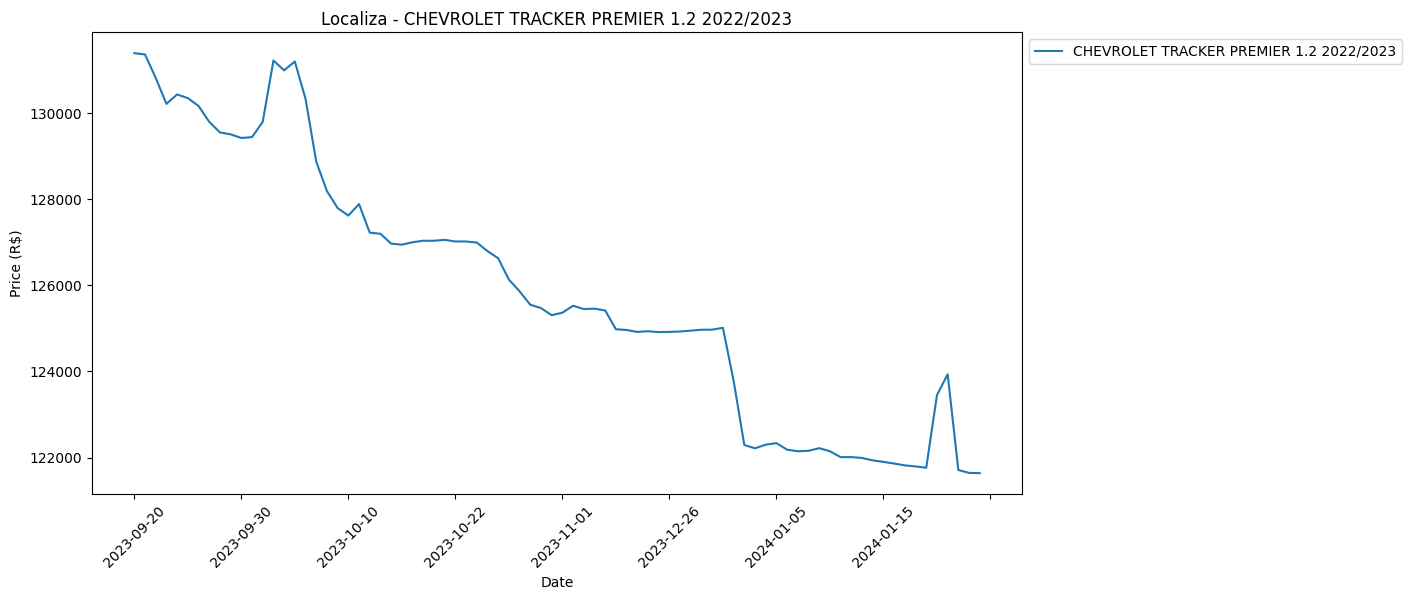

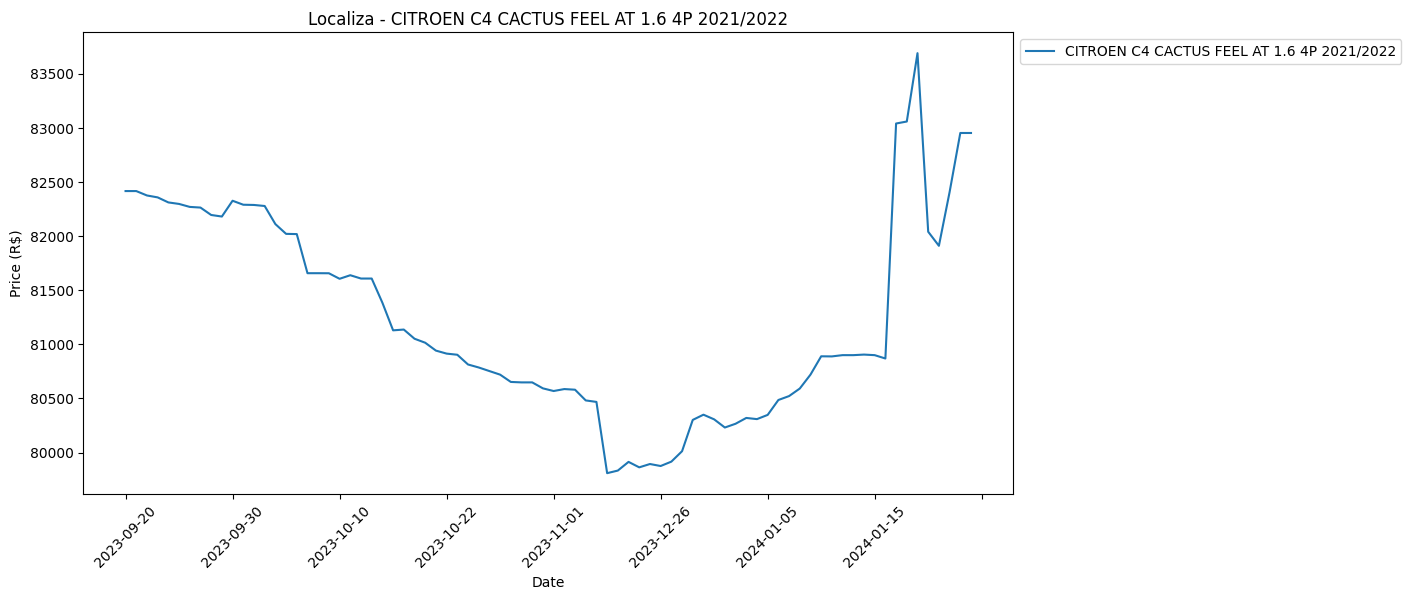

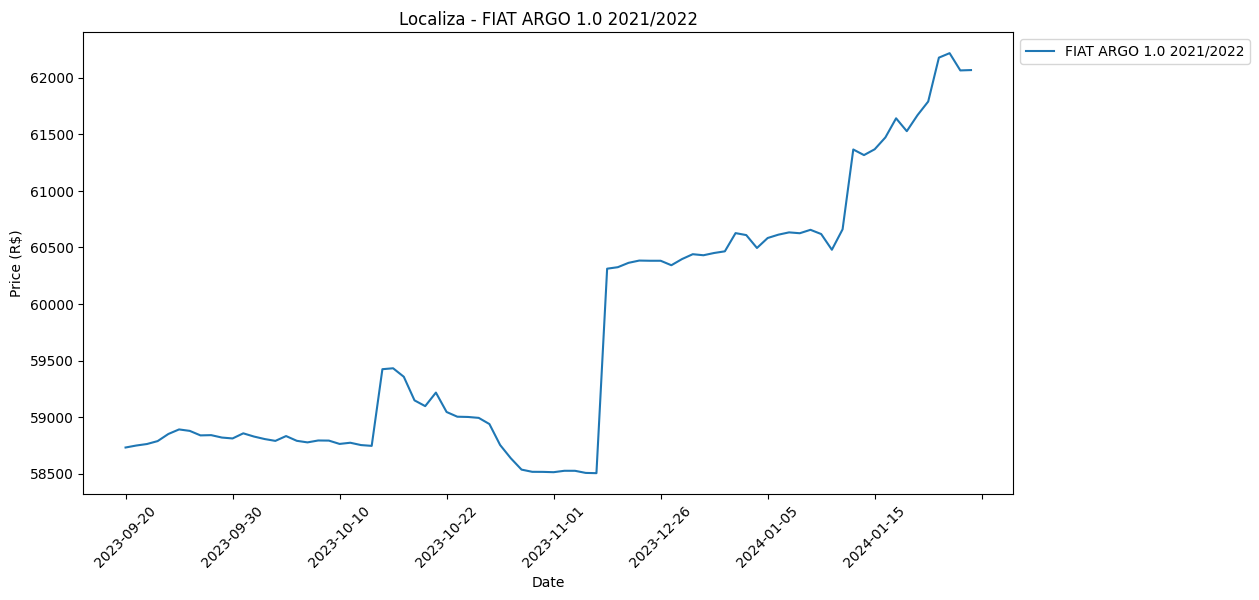

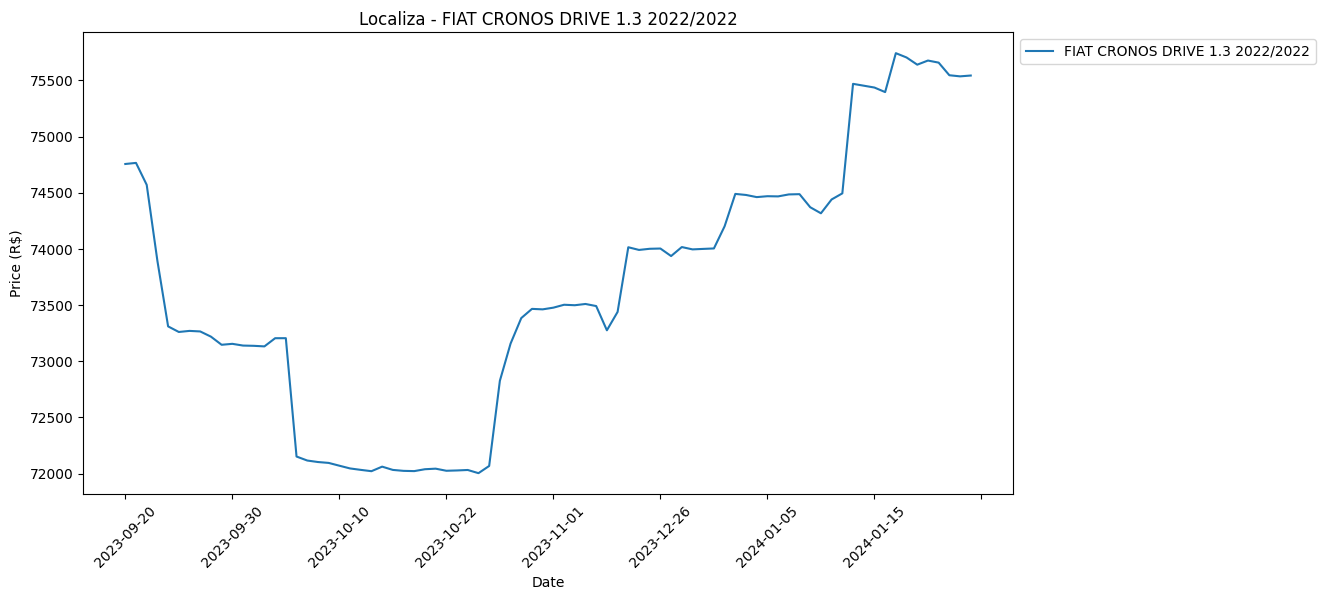

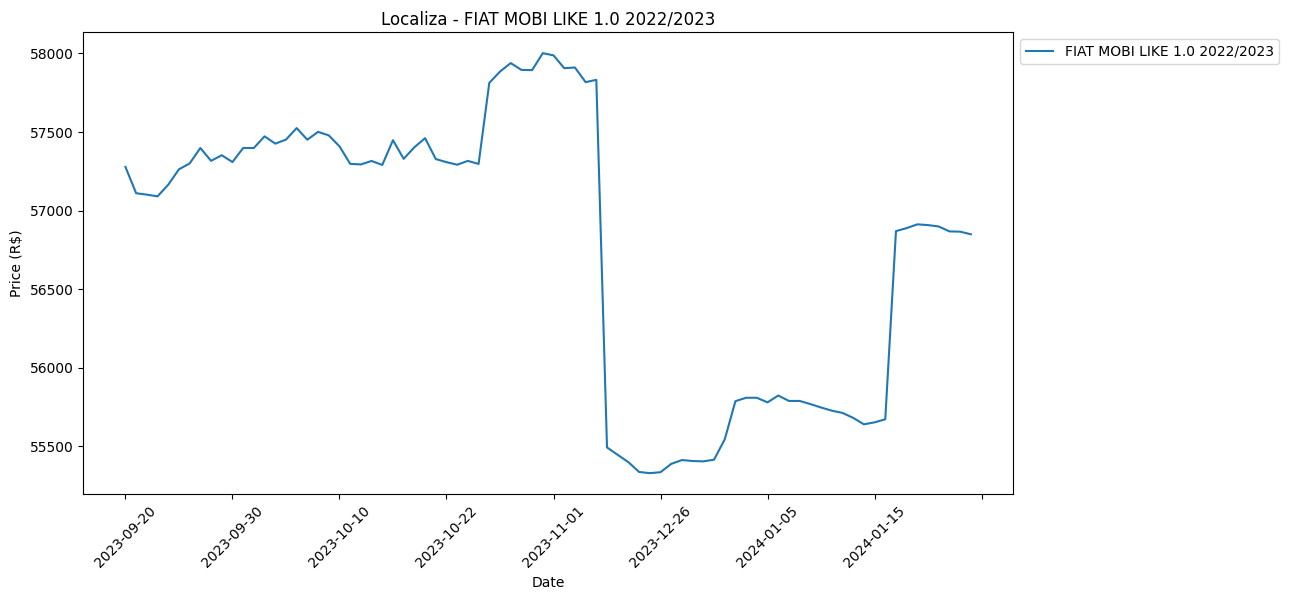

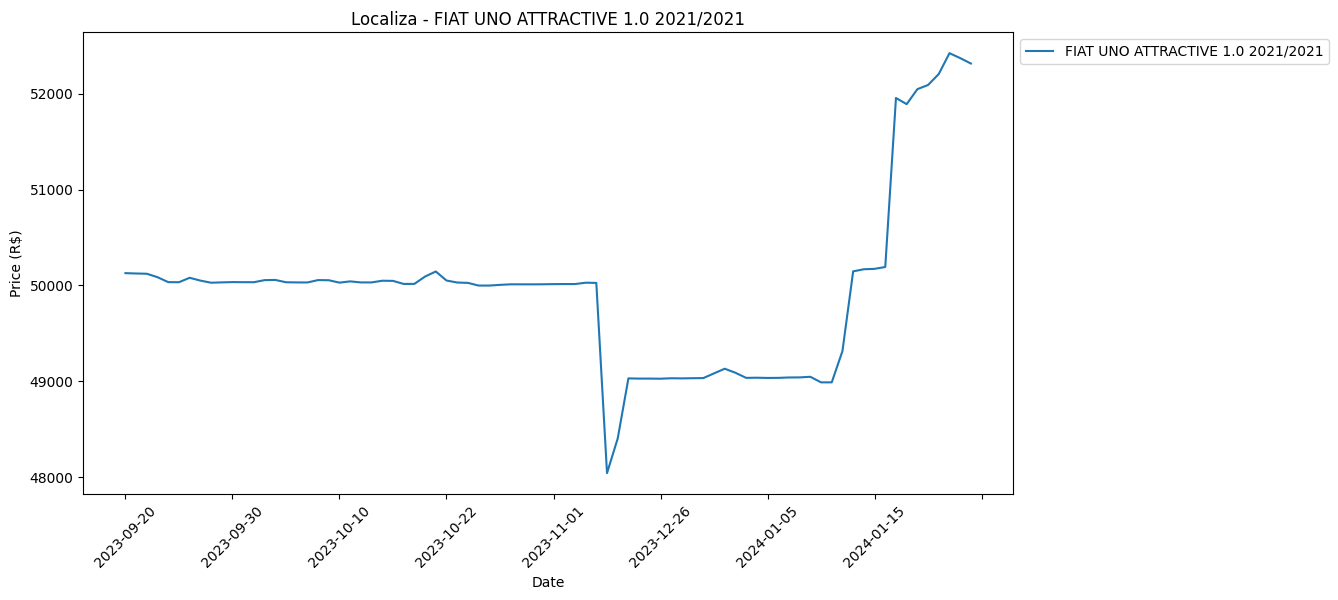

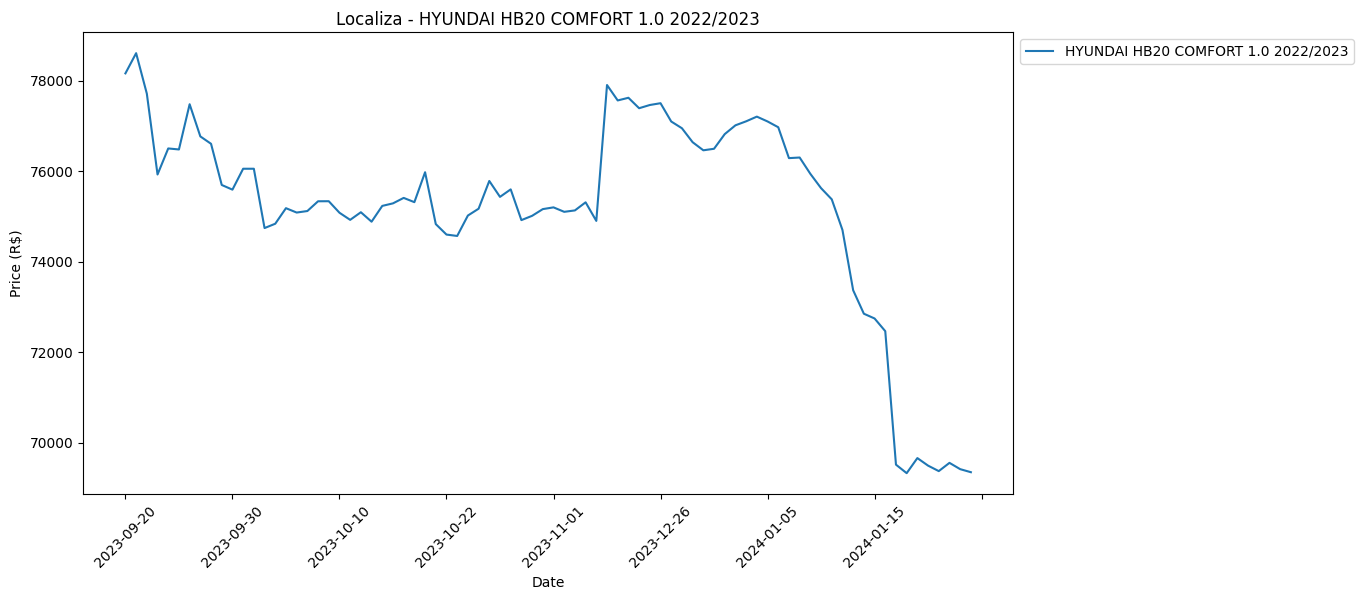

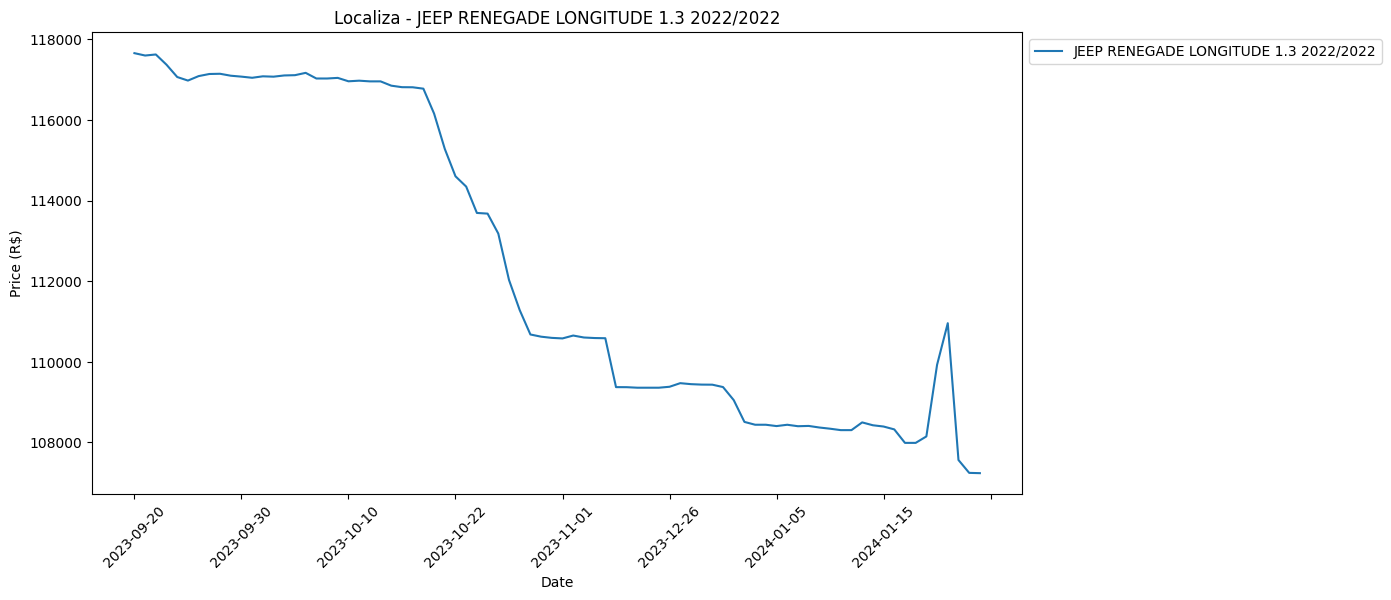

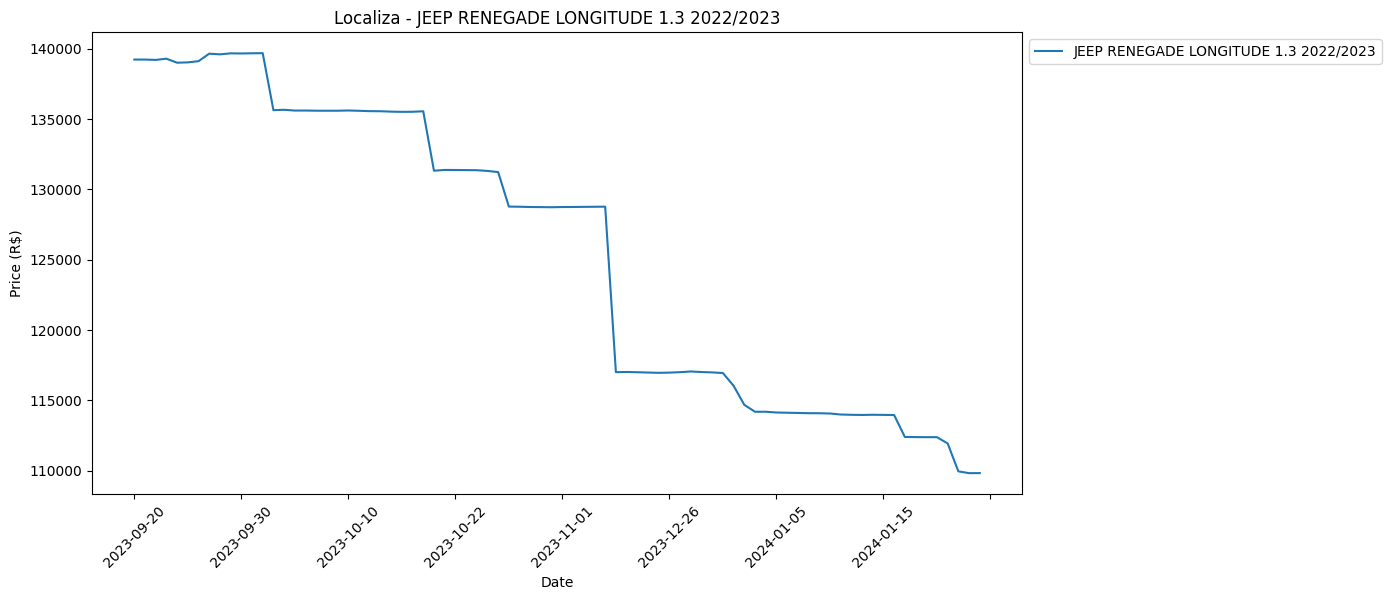

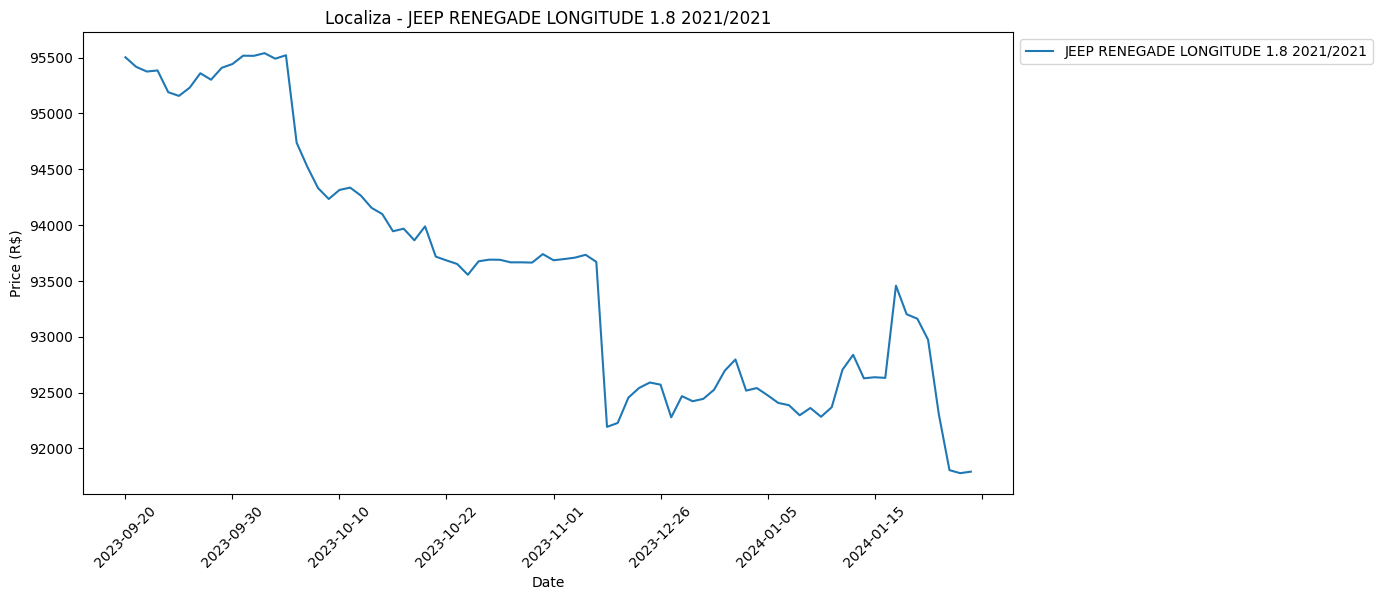

In [52]:
for col in localiza_ts.columns:
    this_plot_df = localiza_ts[[col]]
    this_plot_df.plot(figsize=(12, 6), title=f'Localiza - {col}')
    plt.xlabel('Date')
    plt.ylabel('Price (R$)')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.savefig(f'Localiza - {col}.png'.replace('/', '-'))

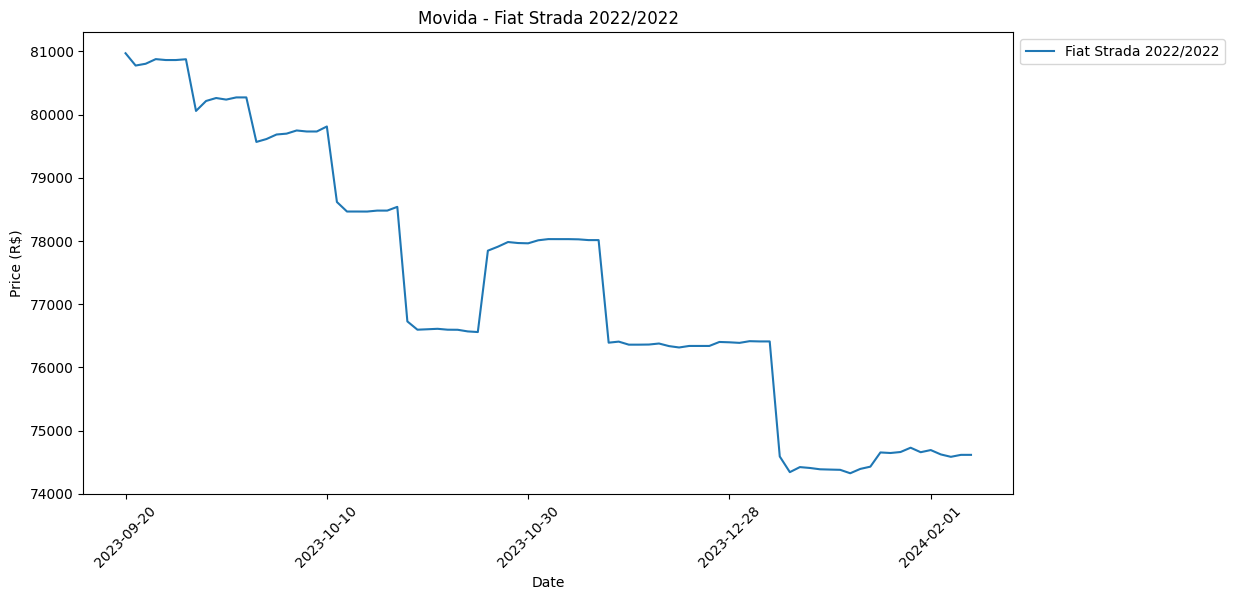

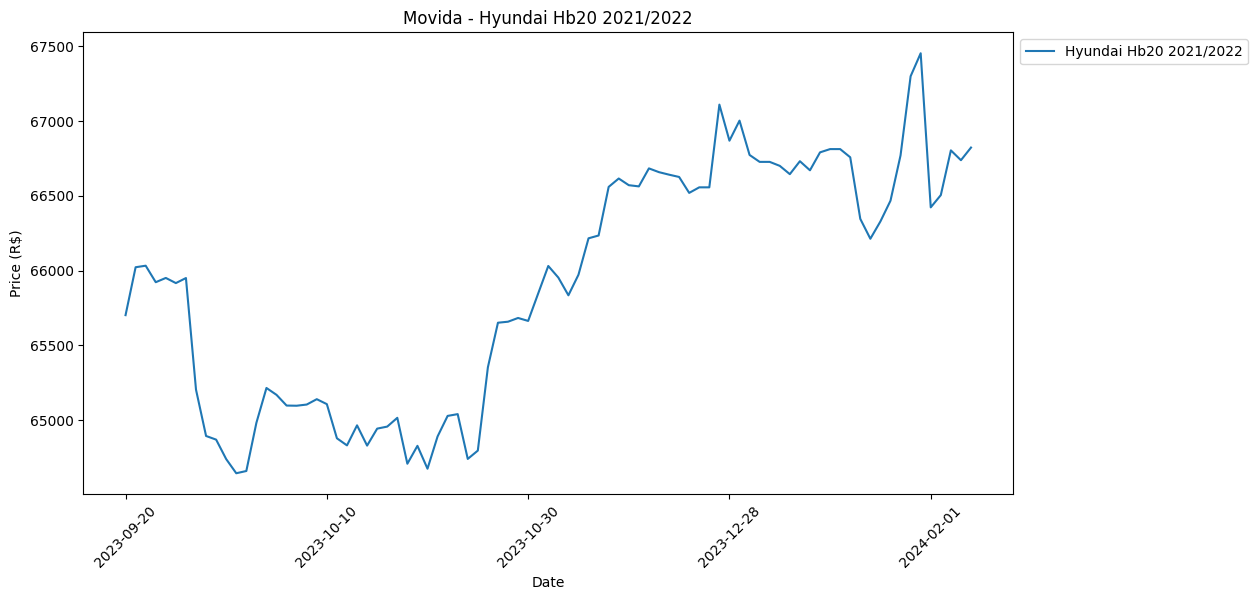

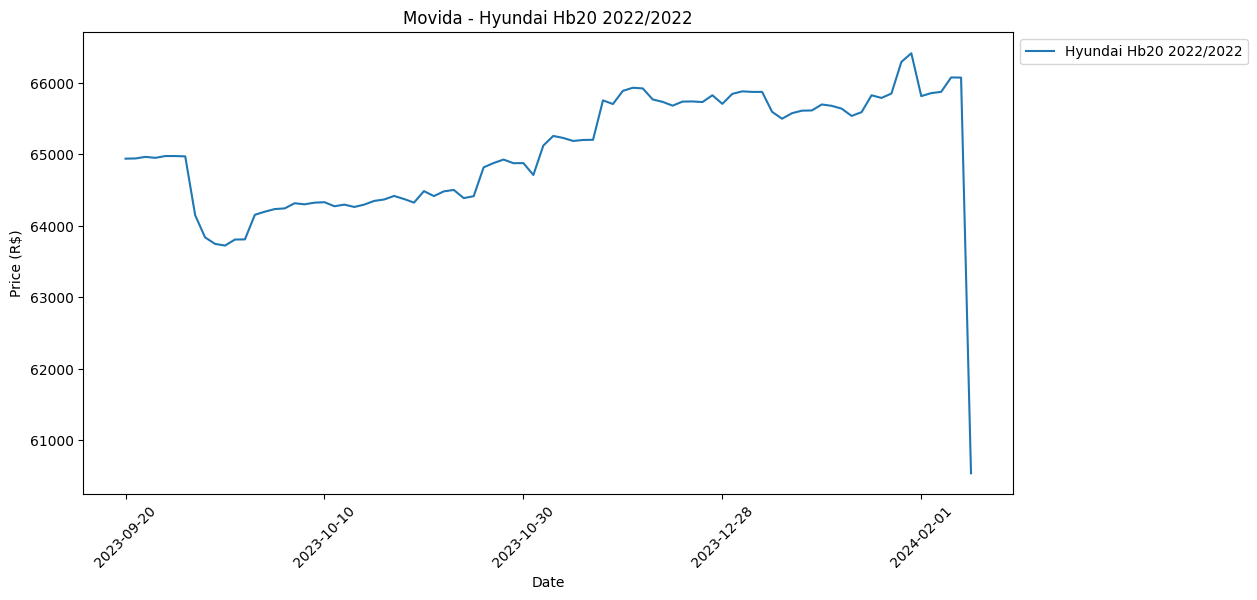

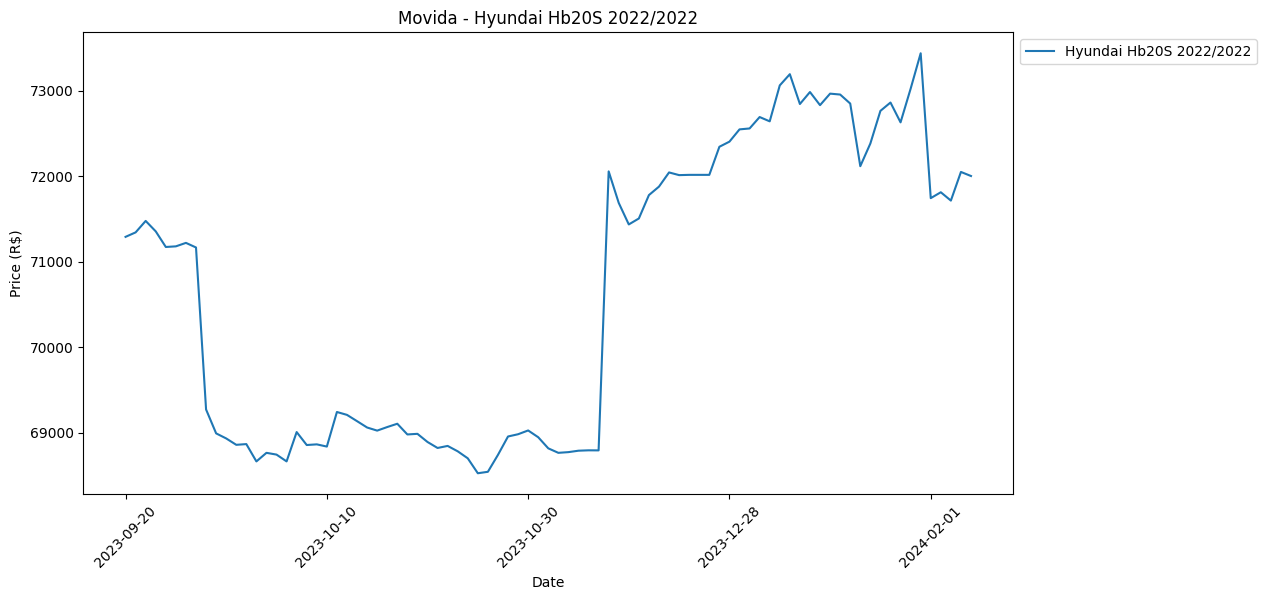

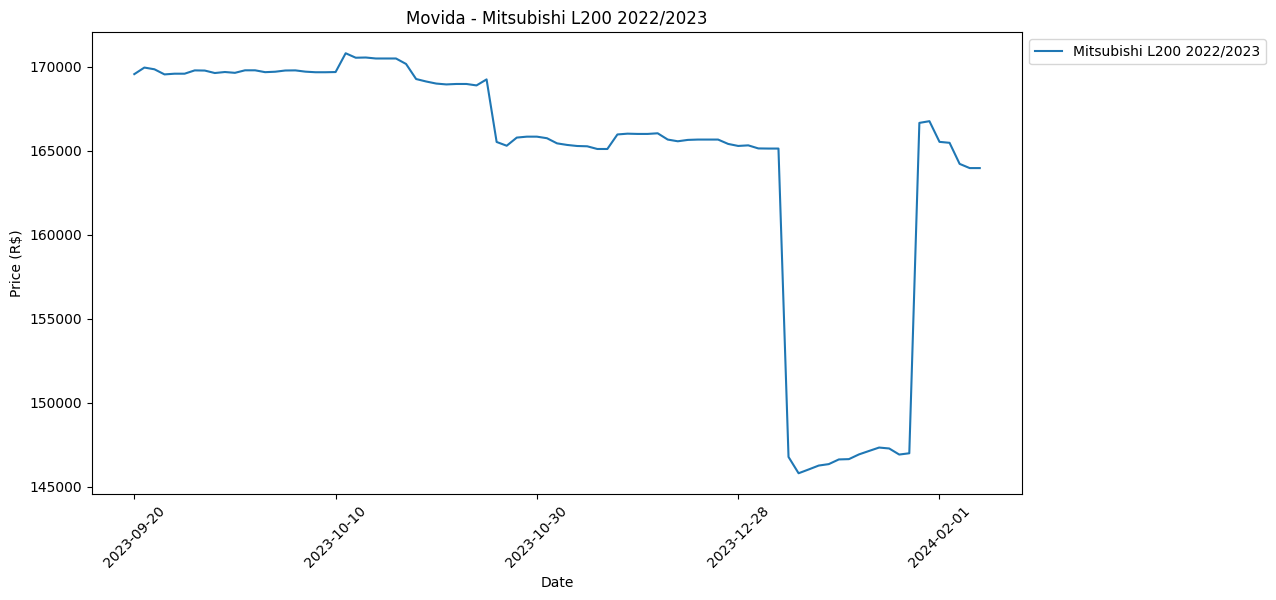

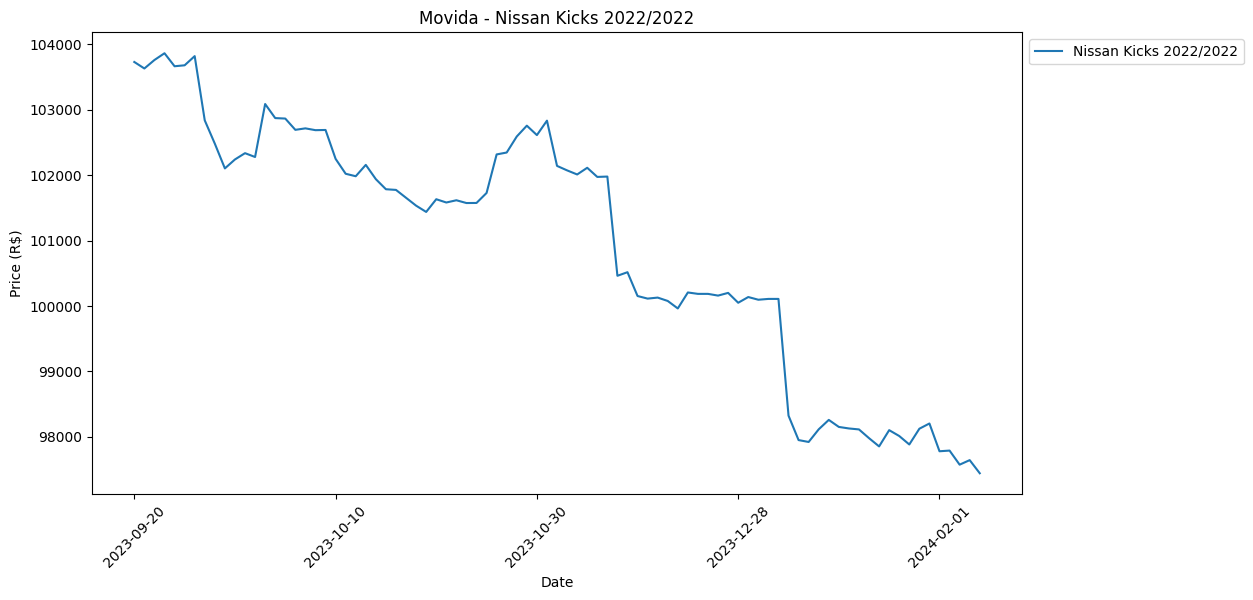

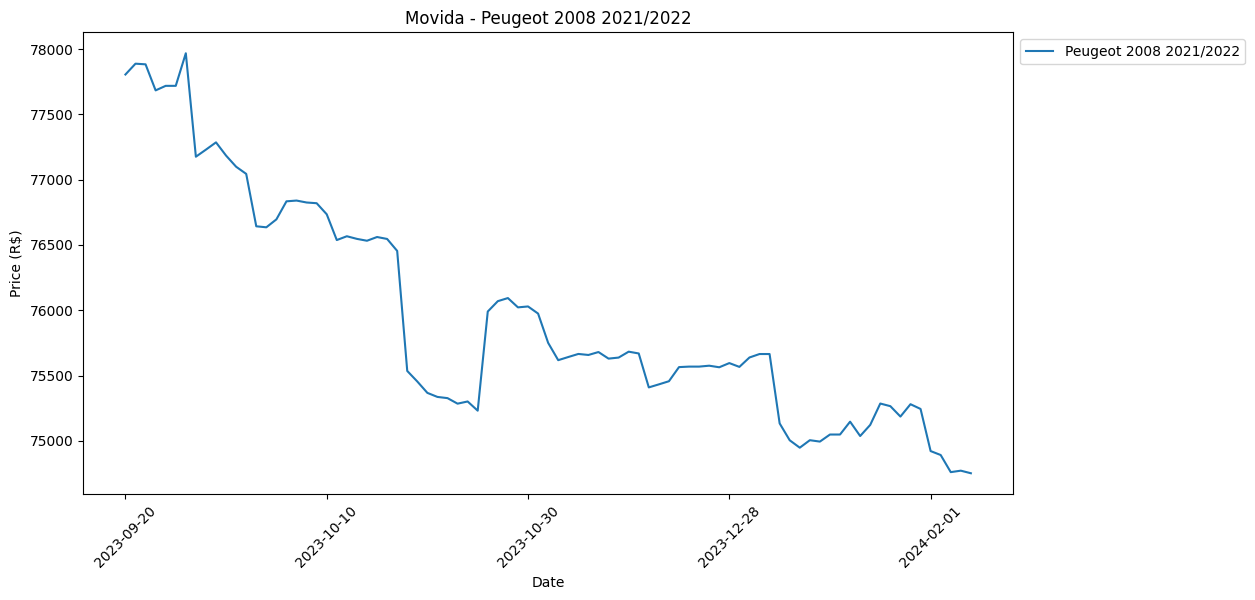

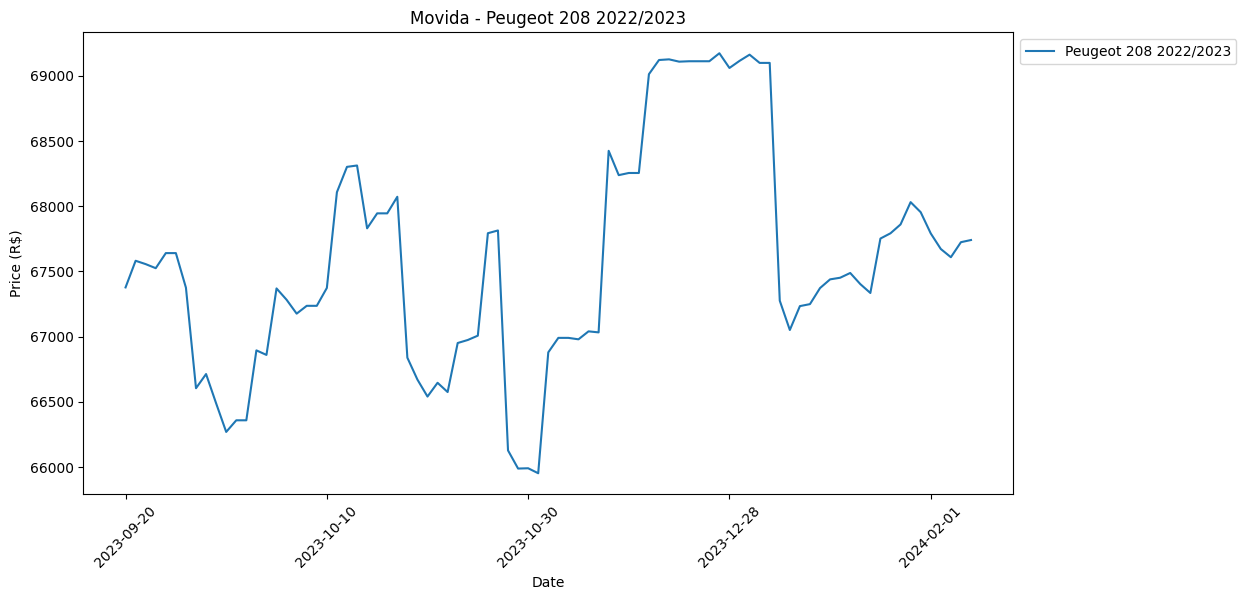

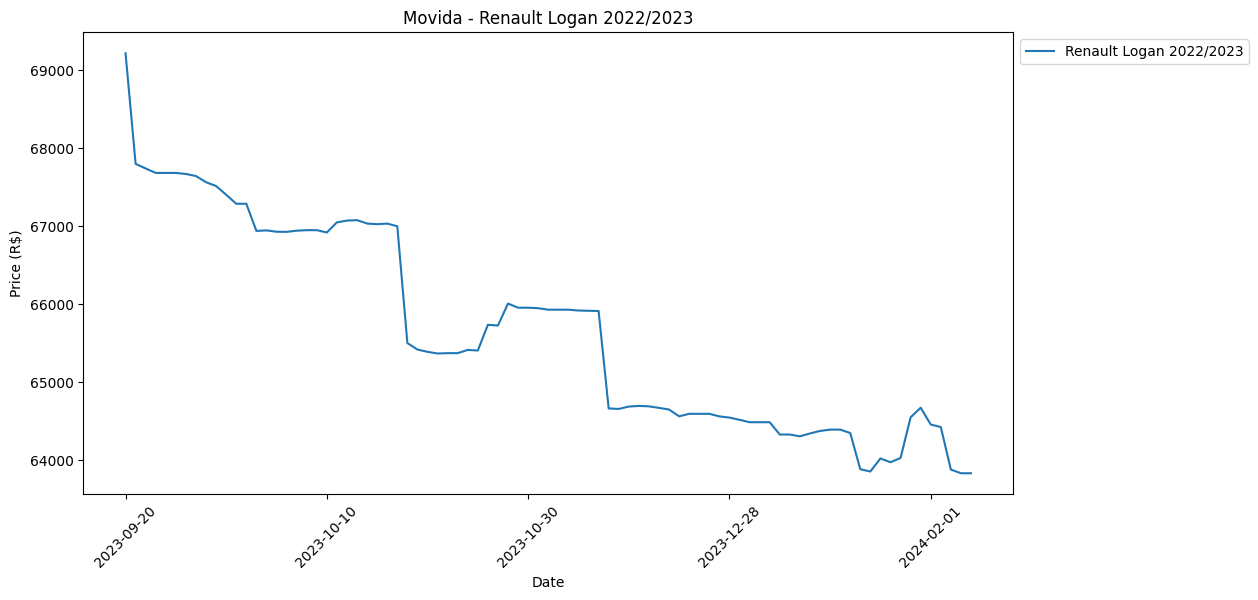

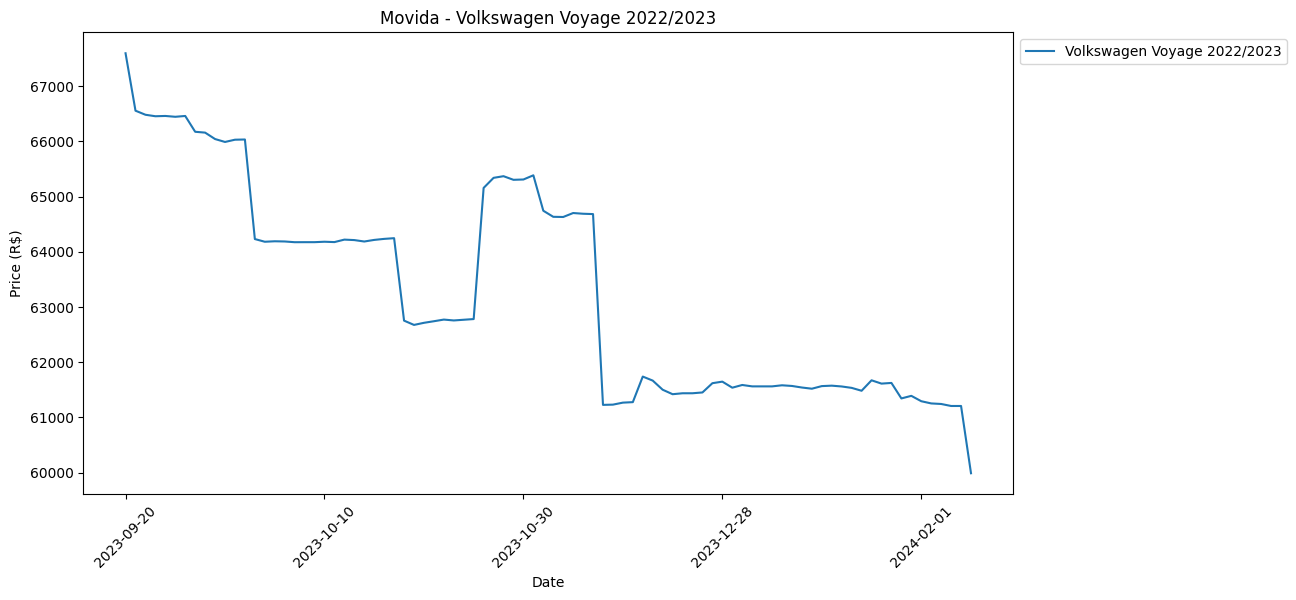

In [54]:
for col in movida_ts.columns:
    this_plot_df = movida_ts[[col]]
    this_plot_df.plot(figsize=(12, 6), title=f'Movida - {col}')
    plt.xlabel('Date')
    plt.ylabel('Price (R$)')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.savefig(f'Movida - {col}.png'.replace('/', '-'))

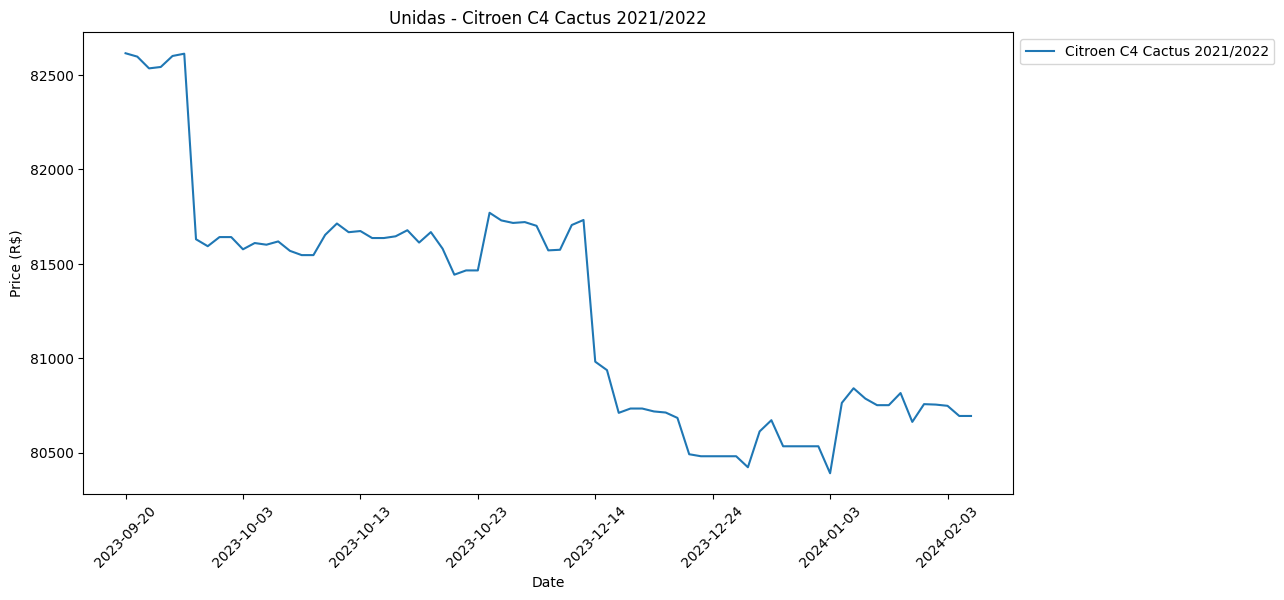

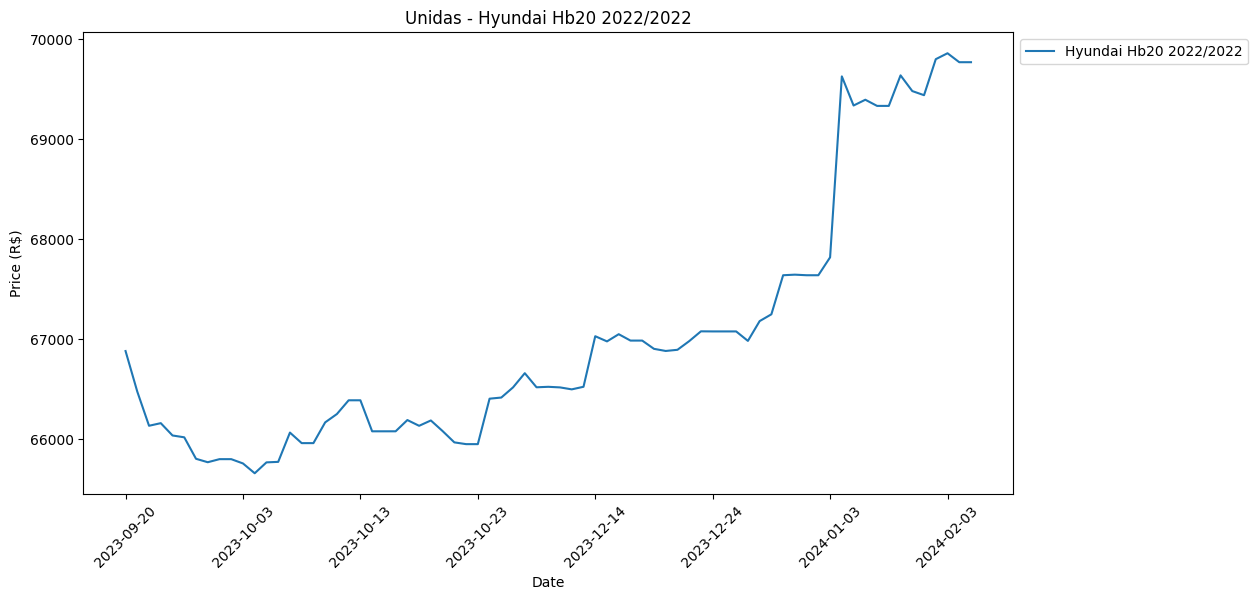

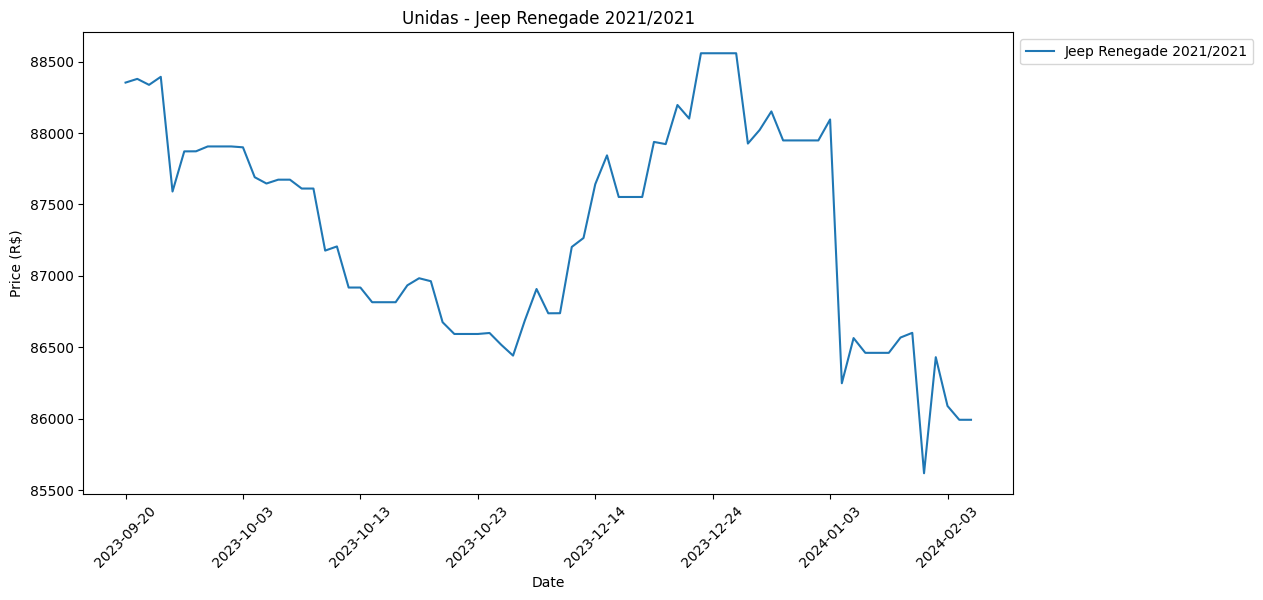

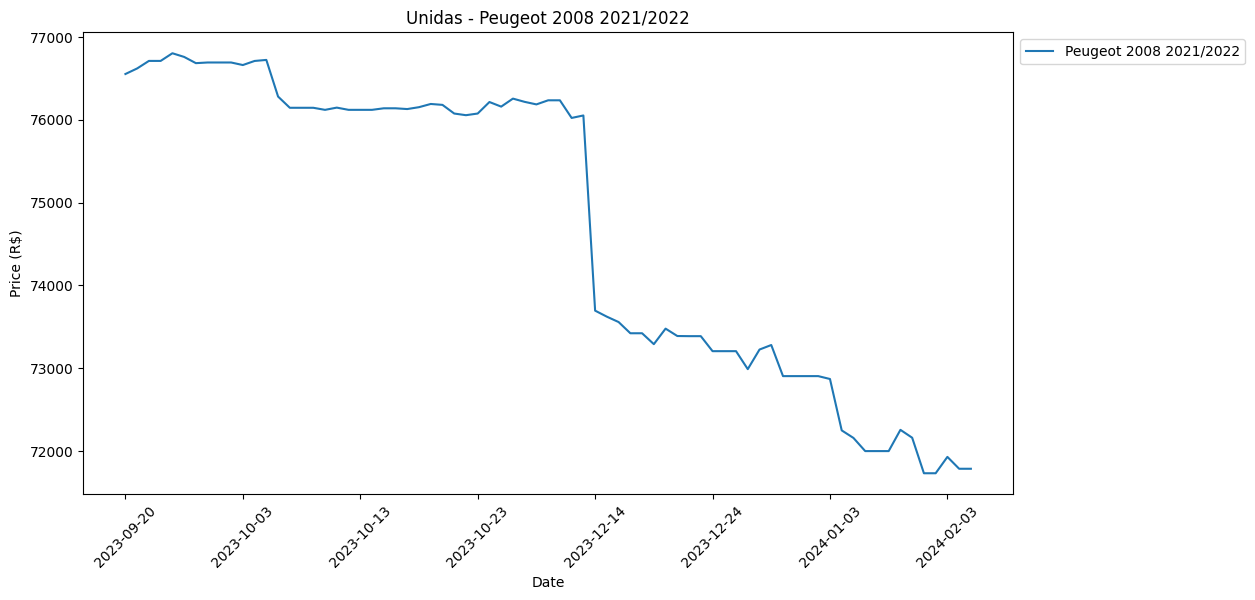

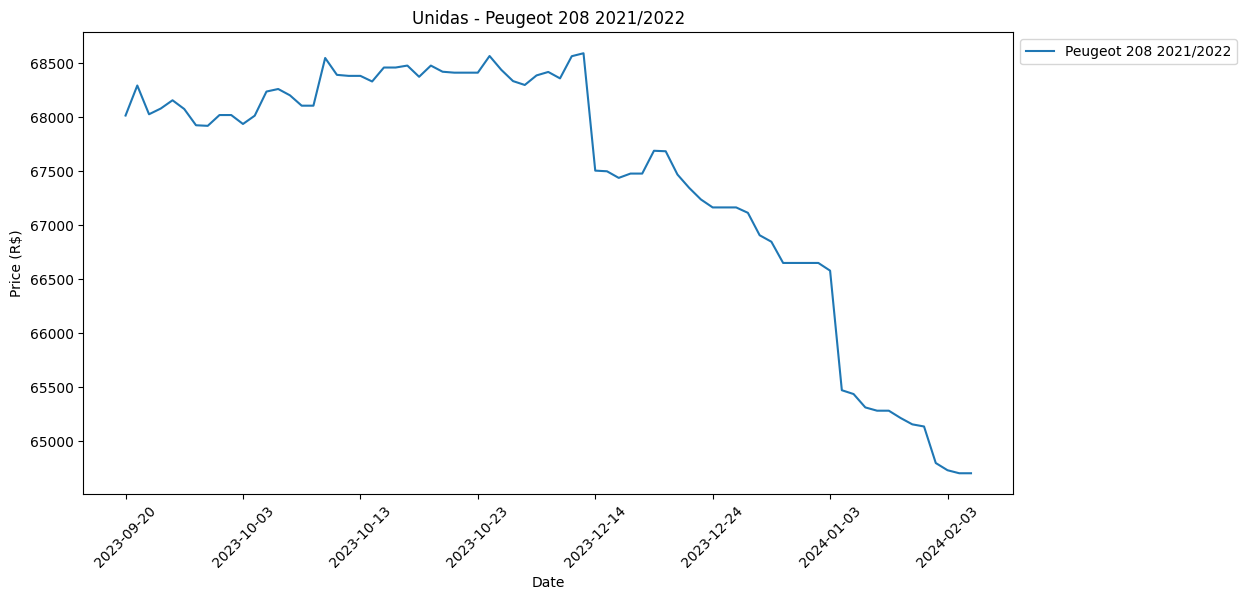

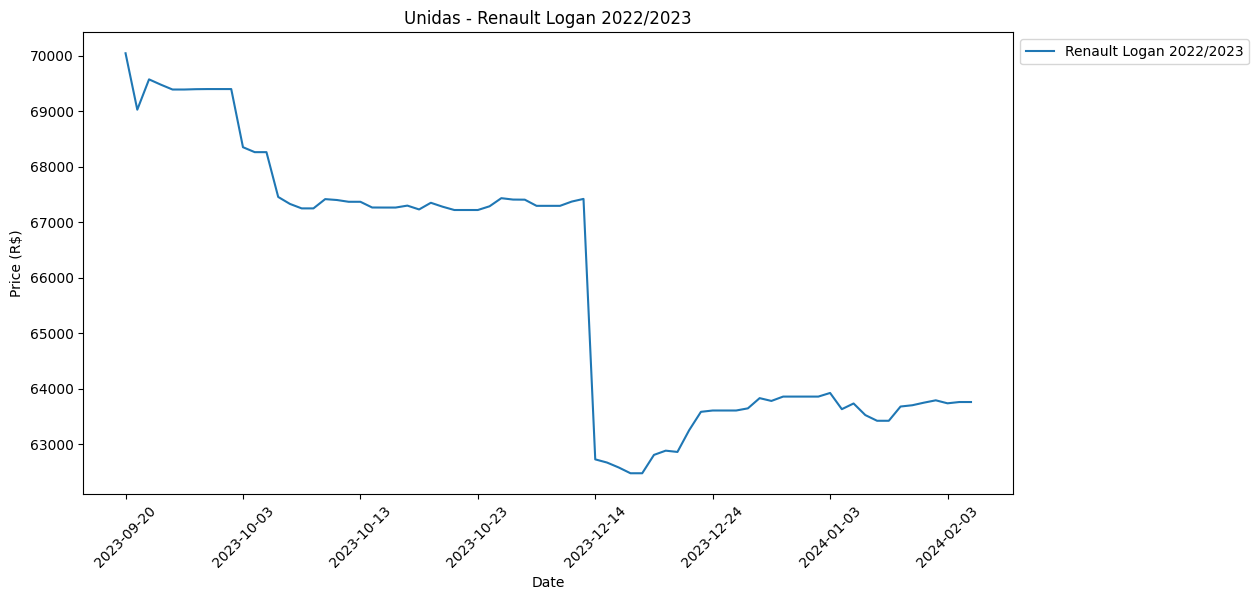

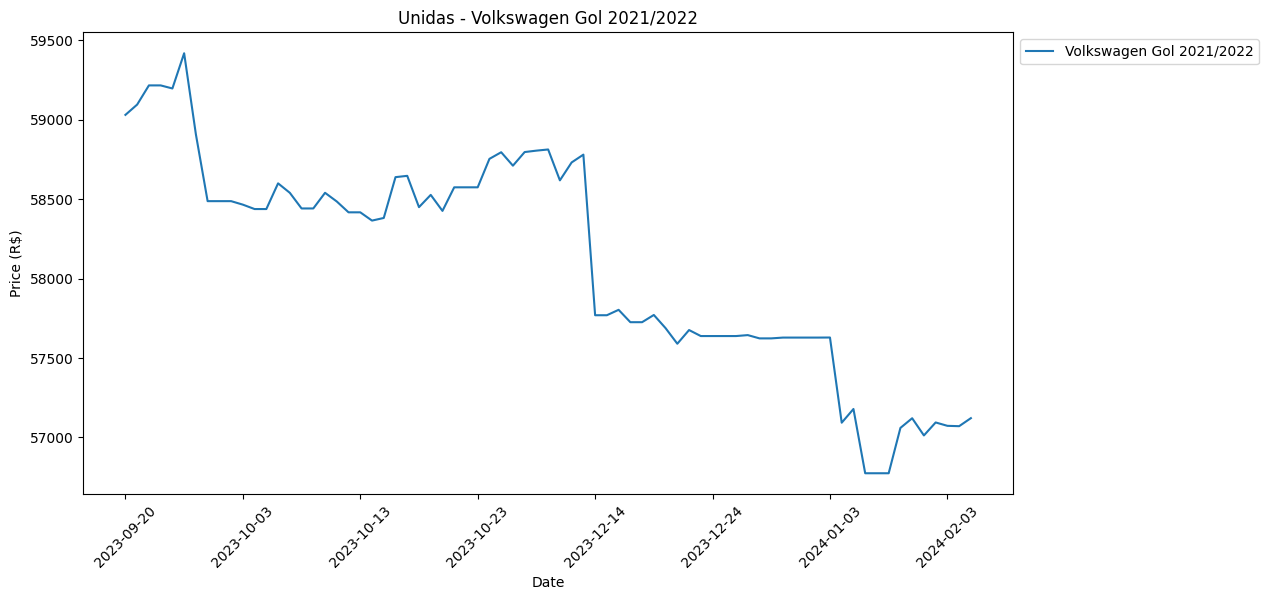

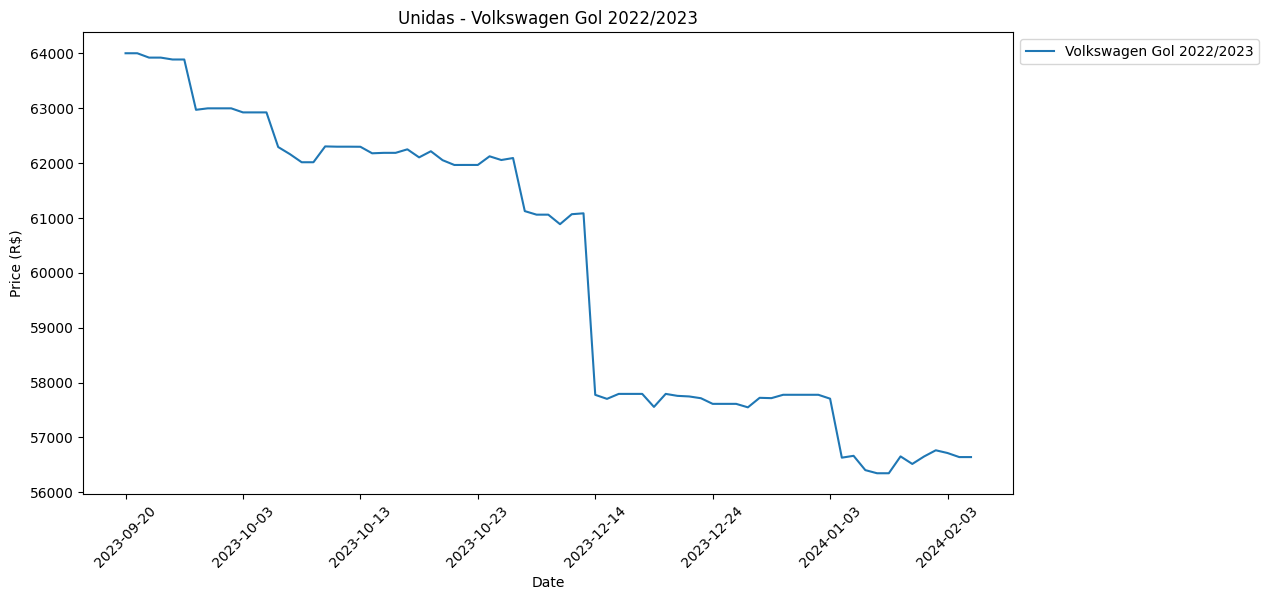

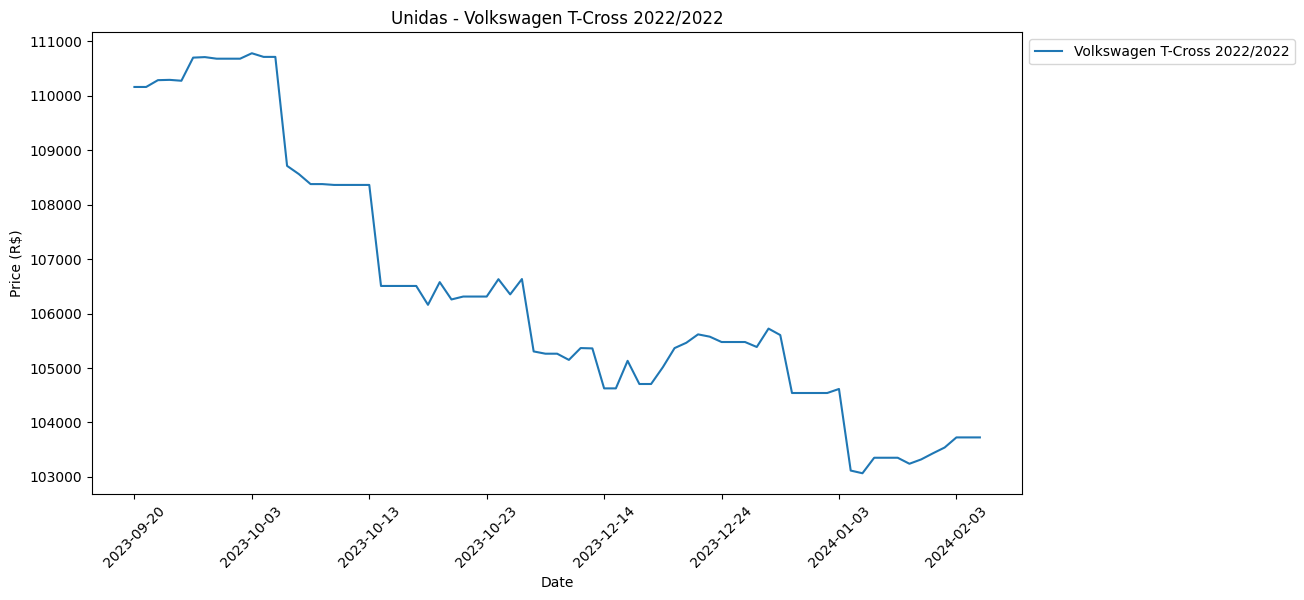

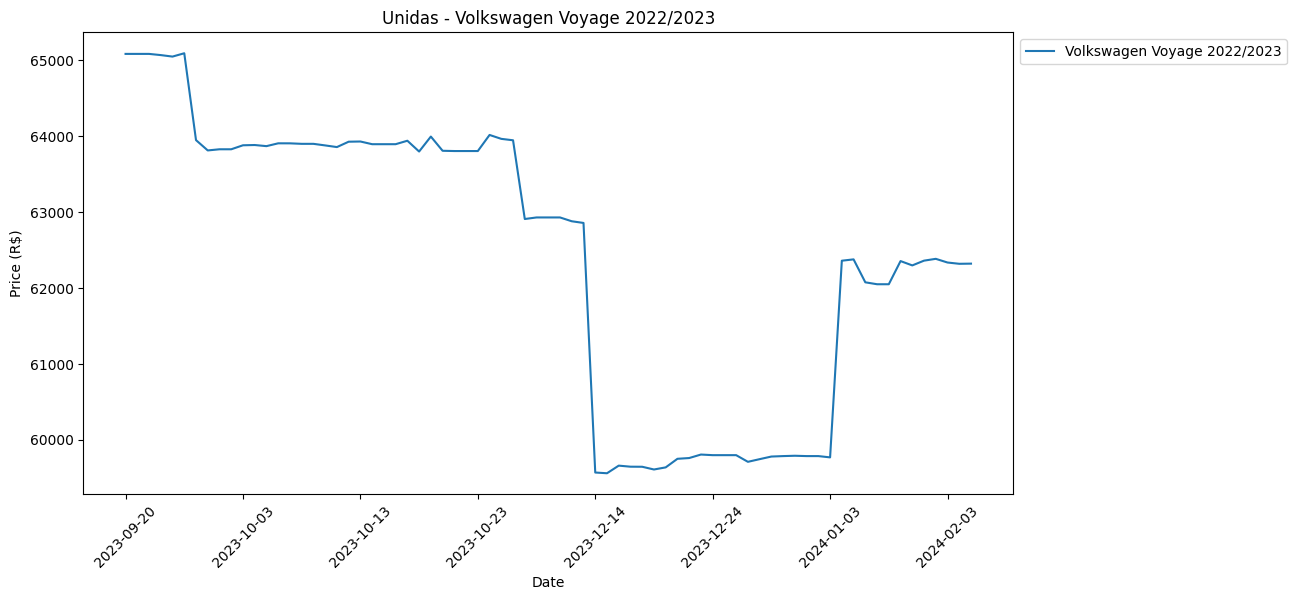

In [56]:
for col in unidas_ts.columns:
    this_plot_df = unidas_ts[[col]]
    this_plot_df.plot(figsize=(12, 6), title=f'Unidas - {col}')
    plt.xlabel('Date')
    plt.ylabel('Price (R$)')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.savefig(f'Unidas - {col}.png'.replace('/', '-'))